In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_csv("winemag-data-130k-v2.csv")
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
wine = wine.drop("Unnamed: 0", axis = 1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [84]:
array = wine["country"].unique()
print(array, len(array))

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt'] 44


In [5]:
wine["country"].isna().sum()

63

In [85]:
array = wine["variety"].unique()
print (len(array), array)

708 ['White Blend' 'Portuguese Red' 'Pinot Gris' 'Riesling' 'Pinot Noir'
 'Tempranillo-Merlot' 'Frappato' 'Gewürztraminer' 'Cabernet Sauvignon'
 'Nerello Mascalese' 'Chardonnay' 'Malbec' 'Tempranillo Blend' 'Meritage'
 'Red Blend' 'Merlot' "Nero d'Avola" 'Chenin Blanc' 'Gamay'
 'Sauvignon Blanc' 'Viognier-Chardonnay' 'Primitivo' 'Catarratto'
 'Inzolia' 'Petit Verdot' 'Monica' 'Bordeaux-style White Blend' 'Grillo'
 'Sangiovese' 'Cabernet Franc' 'Champagne Blend'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Touriga Nacional'
 'Carmenère' 'Albariño' 'Petit Manseng' 'Rosé' 'Zinfandel' 'Vernaccia'
 'Rosato' 'Grüner Veltliner' 'Viognier' 'Vermentino' 'Grenache Blanc'
 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon' 'Pinot Blanc'
 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend' 'Portuguese White'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Sangiovese Grosso' 'Torrontés'
 'Prugnolo Gentile' 'G-S-M' 'Verdejo' 'Fumé Blanc' 'Furmint'
 'Pinot Bianco' 'Bonarda' 'Shiraz' 'Montepulcia

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129970 entries, 0 to 129970
Data columns (total 13 columns):
country                  129907 non-null object
description              129970 non-null object
designation              92506 non-null object
points                   129970 non-null int64
price                    120974 non-null float64
province                 129907 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129970 non-null object
variety                  129970 non-null object
winery                   129970 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [6]:
new_world = ['US','Argentina', 'Chile', 'Australia', 'South Africa',
       'New Zealand', 'Mexico','Canada', 'Brazil', 'Peru']
old_world = ['Italy', 'Portugal', 'Spain', 'France', 'Germany', 'Austria','Hungary', 'Greece', 'Romania',
        'Turkey', 'Czech Republic', 'Slovenia',
        'Croatia', 'Georgia', 'Uruguay', 'England', 'Serbia', 'Moldova',
        'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
        'Slovakia', 'Macedonia']


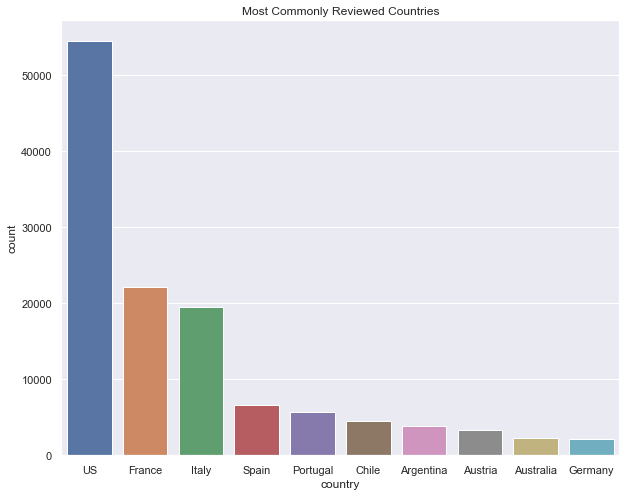

In [75]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x="country", data=wine, order=wine["country"].value_counts().iloc[:10].index)
ax.set_title('Most Commonly Reviewed Countries');

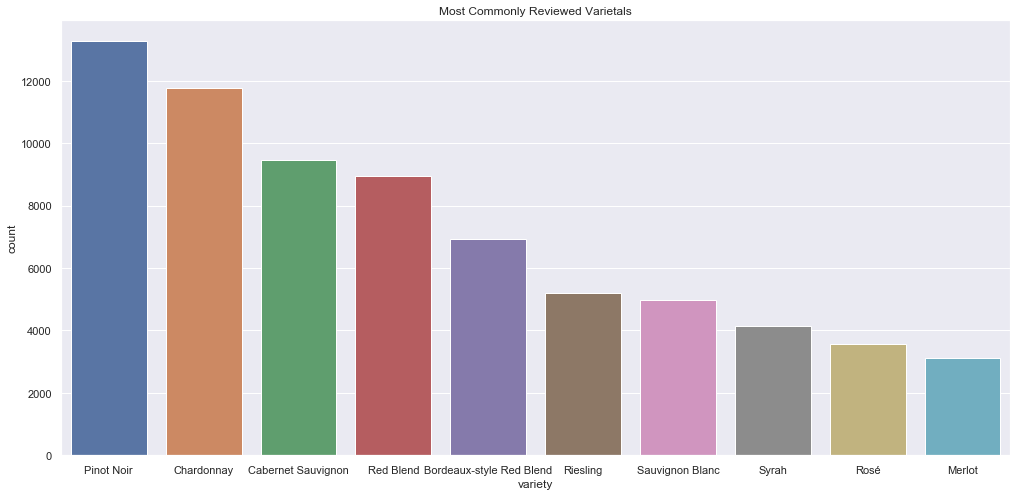

In [76]:
sns.set(rc={'figure.figsize':(17,8)})
ax = sns.countplot(x="variety", data=wine, order=wine["variety"].value_counts().iloc[:10].index)
ax.set_title('Most Commonly Reviewed Varietals');

In [9]:
variety_country_table = pd.crosstab(index=wine["country"], 
                          columns=wine["variety"])
variety_country_table

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Albarossa,Aleatico,...,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,16,5,0,0,201,0,0
Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bulgaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#variety_country_table[:10].sort(ascending=0).plot(kind='bar', figsize=(17, 8), stacked = True);

In [18]:
grouped = wine.groupby(['country','variety']).sum().reset_index()
grouped.sort_values('country', ascending=False)
grouped

,country,variety,points,price
0,Argentina,Barbera,85,18.0
1,Argentina,Bonarda,9083,1746.0
2,Argentina,Bordeaux-style Red Blend,7994,3573.0
3,Argentina,Bordeaux-style White Blend,83,14.0
4,Argentina,Cabernet Blend,706,290.0
5,Argentina,Cabernet Franc,5723,2887.0
6,Argentina,Cabernet Franc-Cabernet Sauvignon,266,122.0
7,Argentina,Cabernet Franc-Malbec,364,234.0
8,Argentina,Cabernet Sauvignon,46466,10446.0
9,Argentina,Cabernet Sauvignon-Cabernet Franc,84,18.0


In [81]:
grouped2 = pd.crosstab(index=wine["country"], columns=wine["variety"], margins=True)
grouped2 = grouped2.sort_values("All", ascending=False, axis=1)
grouped2 = grouped2.sort_values('All', ascending=False)
grouped2

variety,All,Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,...,Macabeo-Moscatel,Teroldego Rotaliano,Terrantez,Thrapsathiri,Sauvignon-Sémillon,Tinta Amarela,Sauvignon Musqué,Pignolo,Tinta Madeira,Grenache Gris
country,,,,,,,,,,,,,,,,,,,,,
All,129907,13269,11750,9470,8935,6915,5188,4963,4142,3563,...,1,1,1,1,1,1,1,1,1,1
US,54504,9885,6801,7315,2972,1824,1753,2163,3244,907,...,0,0,0,0,0,1,1,0,1,0
France,22093,1966,2808,57,304,4725,718,933,164,1923,...,0,0,0,0,1,0,0,0,0,1
Italy,19540,6,334,131,3624,2,24,49,147,73,...,0,1,0,0,0,0,0,1,0,0
Spain,6645,11,74,53,818,9,1,33,35,150,...,1,0,0,0,0,0,0,0,0,0
Portugal,5691,19,17,16,7,5,4,25,49,235,...,0,0,1,0,0,0,0,0,0,0
Chile,4471,363,516,771,409,37,24,683,273,44,...,0,0,0,0,0,0,0,0,0,0
Argentina,3800,105,295,540,234,89,2,78,57,38,...,0,0,0,0,0,0,0,0,0,0
Austria,3345,99,63,5,92,2,581,128,1,62,...,0,0,0,0,0,0,0,0,0,0


In [82]:
stacked_graph = grouped2.iloc[:10, :25]
stacked_graph = stacked_graph.drop("All")
stacked_graph = stacked_graph.drop("All", axis=1)

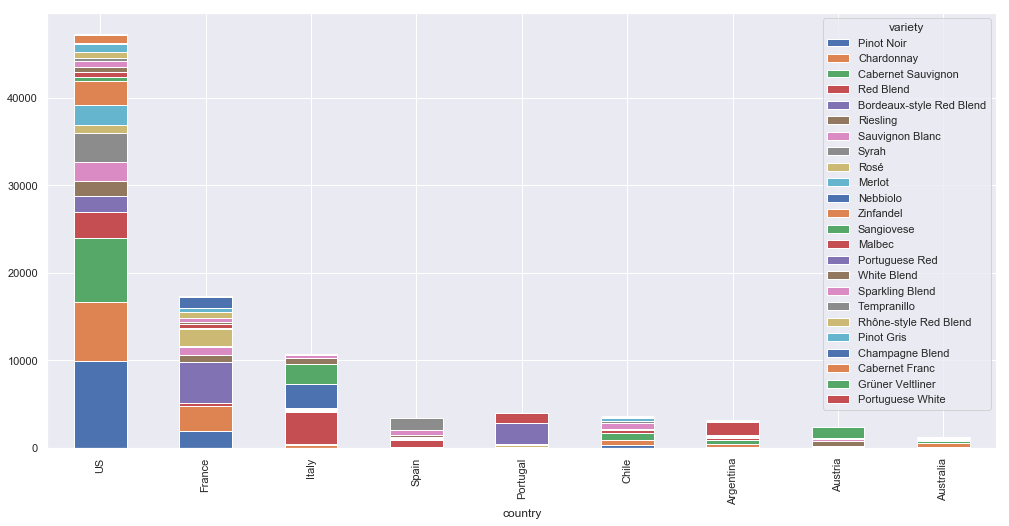

In [83]:
stacked_graph.plot.bar(stacked=True);

In [9]:
import geopandas as gpd

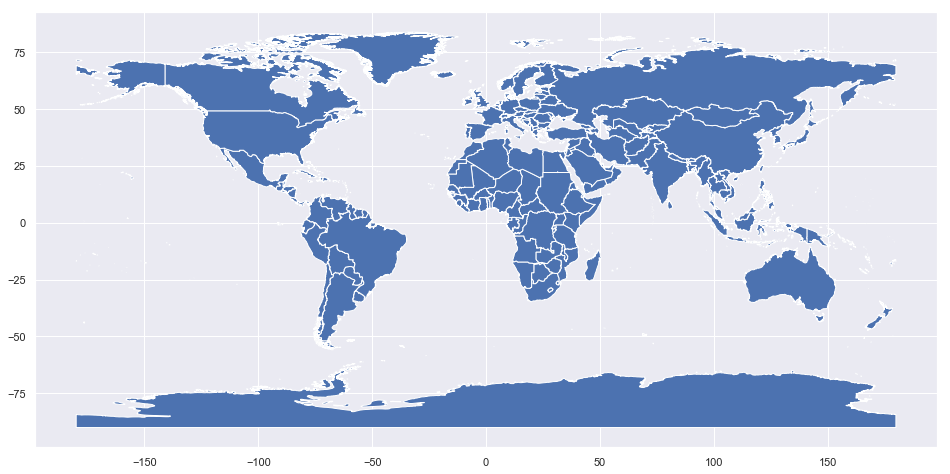

In [17]:
# set the filepath and load in a shapefile
url = "Countries_WGS84.shp"
map_df = gpd.read_file(url)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.plot()

In [20]:
data_for_map = wine[["country", "variety"]]
data_for_map.head()

,country,variety
0,Italy,White Blend
1,Portugal,Portuguese Red
2,US,Pinot Gris
3,US,Riesling
4,US,Pinot Noir


In [24]:
map_df = map_df.drop("OBJECTID", axis = 1)
map_df.head()

,CNTRY_NAME,geometry
0,Aruba,"POLYGON ((-69.8822326660156 12.4111099243165, ..."
1,Antigua and Barbuda,"(POLYGON ((-61.7388916015625 17.5405540466309,..."
2,Afghanistan,"POLYGON ((61.2765579223633 35.6072463989258, 6..."
3,Algeria,"POLYGON ((-5.15213489532459 30.1804695129396, ..."
4,Azerbaijan,"(POLYGON ((45.0258293151855 41.0305480957031, ..."


In [26]:
map_df["CNTRY_NAME"].unique()

array(['Aruba', 'Antigua and Barbuda', 'Afghanistan', 'Algeria',
       'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola',
       'American Samoa', 'Argentina', 'Australia', 'Austria', 'Anguilla',
       'Antarctica', 'Bahrain', 'Barbados', 'Botswana', 'Bermuda',
       'Belgium', 'Bahamas, The', 'Bangladesh', 'Belize',
       'Bosnia and Herzegovina', 'Bolivia', 'Myanmar (Burma)', 'Benin',
       'Byelarus', 'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria',
       'Bouvet Island', 'Brunei', 'Burundi', 'Canada', 'Cambodia', 'Chad',
       'Sri Lanka', 'Congo', 'Zaire', 'China', 'Chile', 'Cayman Islands',
       'Cocos (Keeling) Islands', 'Cameroon', 'Comoros', 'Colombia',
       'Northern Mariana Islands', 'Costa Rica',
       'Central African Republic', 'Cuba', 'Cape Verde', 'Cook Islands',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Jarvis Island',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Ireland',
       'Equatorial Guinea', 'Estonia', 'Eritrea', 'El Salvado

In [27]:
map_df.loc[map_df["CNTRY_NAME"]=="United States", "CNTRY_NAME"] = "US"
map_df["CNTRY_NAME"].unique()

array(['Aruba', 'Antigua and Barbuda', 'Afghanistan', 'Algeria',
       'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola',
       'American Samoa', 'Argentina', 'Australia', 'Austria', 'Anguilla',
       'Antarctica', 'Bahrain', 'Barbados', 'Botswana', 'Bermuda',
       'Belgium', 'Bahamas, The', 'Bangladesh', 'Belize',
       'Bosnia and Herzegovina', 'Bolivia', 'Myanmar (Burma)', 'Benin',
       'Byelarus', 'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria',
       'Bouvet Island', 'Brunei', 'Burundi', 'Canada', 'Cambodia', 'Chad',
       'Sri Lanka', 'Congo', 'Zaire', 'China', 'Chile', 'Cayman Islands',
       'Cocos (Keeling) Islands', 'Cameroon', 'Comoros', 'Colombia',
       'Northern Mariana Islands', 'Costa Rica',
       'Central African Republic', 'Cuba', 'Cape Verde', 'Cook Islands',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Jarvis Island',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Ireland',
       'Equatorial Guinea', 'Estonia', 'Eritrea', 'El Salvado

In [57]:
#merged = pd.merge(map_df, wine, left_on="CNTRY_NAME", right_on="country")
#map_df.set_index("CNTRY_NAME").join(data_for_map.set_index("country"))
merged = merged.drop("CNTRY_NAME", axis = 1)
merged.head()

,geometry,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,"(POLYGON ((45.528881072998 40.6060981750488, 4...",Armenia,"Medium straw in the glass, this wine has a nos...",Estate Bottled,87,14.0,Armenia,NaN,NaN,Mike DeSimone,@worldwineguys,Van Ardi 2015 Estate Bottled Kangoun (Armenia),Kangoun,Van Ardi
1,"(POLYGON ((45.528881072998 40.6060981750488, 4...",Armenia,"Deep salmon in color, this wine offers a bouqu...",Estate Bottled,88,15.0,Armenia,NaN,NaN,Mike DeSimone,@worldwineguys,Van Ardi 2015 Estate Bottled Rosé (Armenia),Rosé,Van Ardi
2,(POLYGON ((-71.0164794921874 -36.4759140014648...,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
3,(POLYGON ((-71.0164794921874 -36.4759140014648...,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino
4,(POLYGON ((-71.0164794921874 -36.4759140014648...,Argentina,With attractive melon and other tropical aroma...,NaN,88,12.0,Other,Salta,NaN,Michael Schachner,@wineschach,Alamos 2007 Torrontés (Salta),Torrontés,Alamos


In [64]:
test = merged["country"].value_counts()
test.dtype

dtype('int64')

In [ ]:
new_merged = 

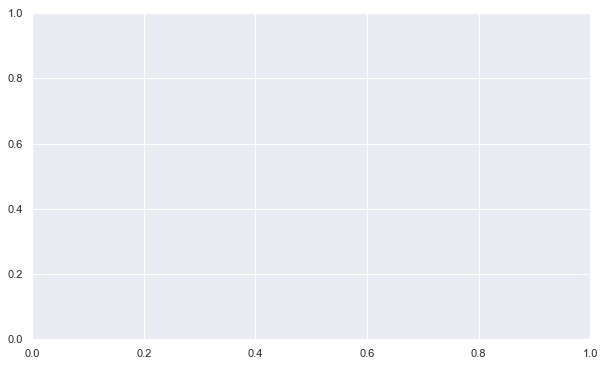

In [44]:
# set a variable that will call whatever column we want to visualise on the map
variable = "variety"
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))


In [46]:
# create map
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 130043 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
geometry    130043 non-null object
variety     129833 non-null object
dtypes: object(2)
memory usage: 3.0+ MB


In [55]:
merged.index.value_counts()

US                                54504
France                            22093
Italy                             19540
Spain                              6645
Portugal                           5691
Chile                              4472
Argentina                          3800
Austria                            3345
Australia                          2329
Germany                            2165
New Zealand                        1419
South Africa                       1401
Israel                              505
Greece                              466
Canada                              257
Hungary                             146
Bulgaria                            141
Romania                             120
Uruguay                             109
Turkey                               90
Slovenia                             87
Georgia                              86
Croatia                              73
Mexico                               70
Moldova                              59


In [ ]:
merged = merged.index.